In [3]:
import matplotlib.pyplot as plt
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np 
import IPython.display as ipd
%matplotlib inline

In [4]:
filepath = '/home/bob/Music/CloudMusic/'
music_name = 'AGA-Wonderful U.mp3'
filename = filepath + music_name

In [5]:
#load a music

#return a time series:y and sampling rate:sr
y, sr = librosa.load(filename)
print("y为每首歌的时间序列")
print("y.shape:{0}, 采样率:{1}".format(y.shape, sr))

y为每首歌的时间序列
y.shape:(5485452,), 采样率:22050


In [6]:
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)
chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)

melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
mfcc = librosa.feature.mfcc(y=y, sr=sr)
rmse = librosa.feature.rmse(y=y)

spectral_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
S = np.abs(librosa.stft(y))
spectral_contrast = librosa.feature.spectral_contrast(S=S, sr=sr)
#often converted to dB scale.
spectral_flatness = librosa.feature.spectral_flatness(y=y)
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, 
                                sr=sr, roll_percent=0.95)

#获得将n阶多项式拟合到谱图列的系数
p0 = librosa.feature.poly_features(S=S, order=0)
p1 = librosa.feature.poly_features(S=S, order=1) #线性拟合
p2 = librosa.feature.poly_features(S=S, order=2) #平方拟合

#从音频时间序列中提取谐波元素
y_hrmonic = librosa.effects.harmonic(y)
tonnetz = librosa.feature.tonnetz(y=y_hrmonic, sr=sr)

zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

#节拍跟踪器, 返回每分钟估计节拍数量 和 检测到节奏的帧数位置的列表
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)

In [27]:
from os import listdir
from PIL import Image

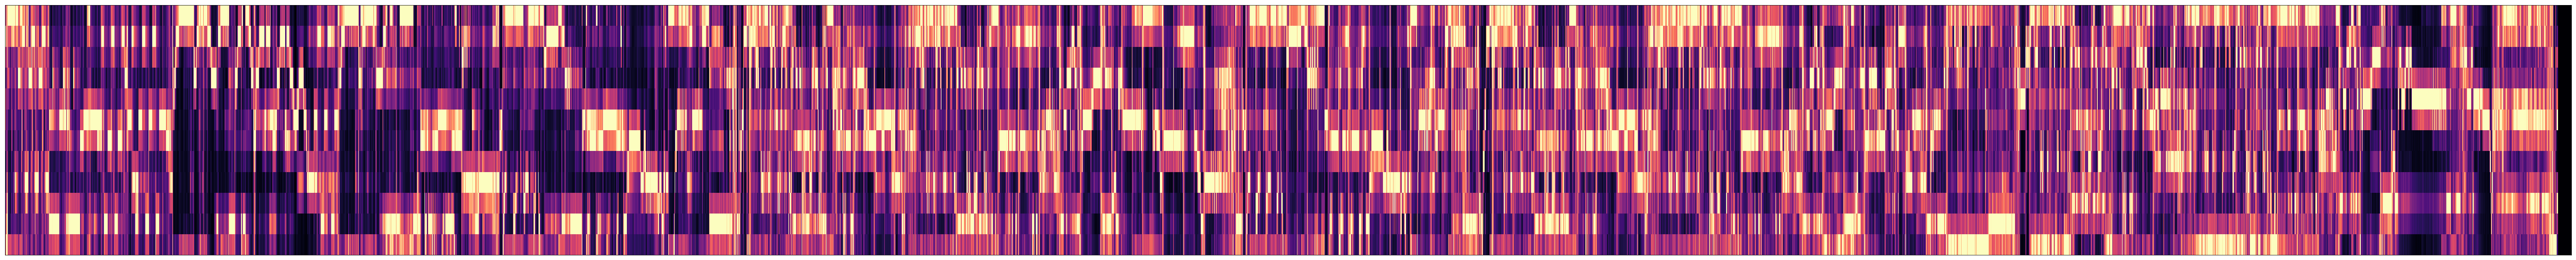

In [91]:
plt.figure(figsize=(100, 10))
librosa.display.specshow(chroma_cqt)
plt.savefig('/home/bob/Desktop/pic/tight128.png', dpi=128, 
            transparent=True, bbox_inches='tight', pad_inches=0)

#figure_fig = plt.gcf()  # 'get current figure'
#figure_fig.savefig('/home/bob/Desktop/11.eps', format='eps', dpi=100)

In [92]:
path = '/home/bob/Desktop/pic/'
ims = [Image.open(path + '/' + fn) for fn in listdir('/home/bob/Desktop/pic/') if fn.endswith('.png')]

In [94]:
width, height = ims[0].size
result = Image.new(ims[0].mode, (width, height*len(ims)))

for i, im in enumerate(ims):
    result.paste(im, box=(0, i*height), )

result.save('/home/bob/Desktop/result.png')

In [69]:
print(type(result), i)

<class 'PIL.Image.Image'> 6
